# CNN to Classify Images

In this homework, you will learn how to implement a Convolutional Neural Network with Pytorch. Please review the knowledge in Chapter 4. Please carefully read the materials from step 1 to step 3. Then, please check the requirment for HW5. Please finish this and submit it to the canvas.

## Step 1. Understand the task. Get to know the dataset

In this task, you need to design a classifier to recognize 10 things from the images. They are:

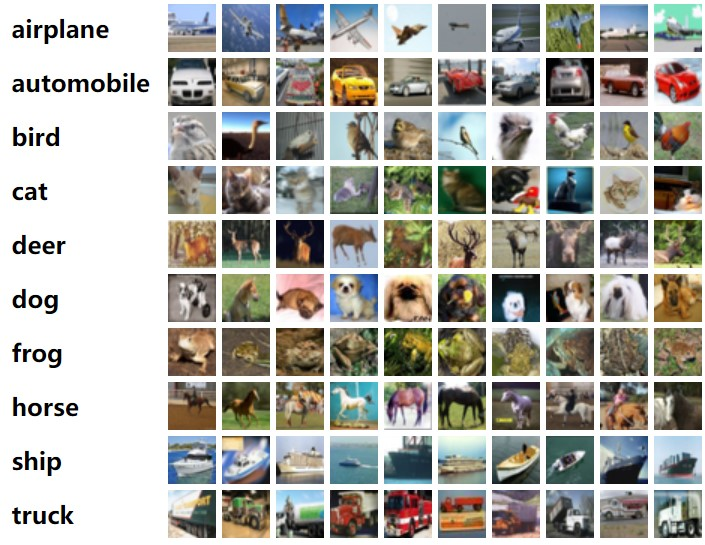

## Attentions: to construct a colored image you need RGB channels.

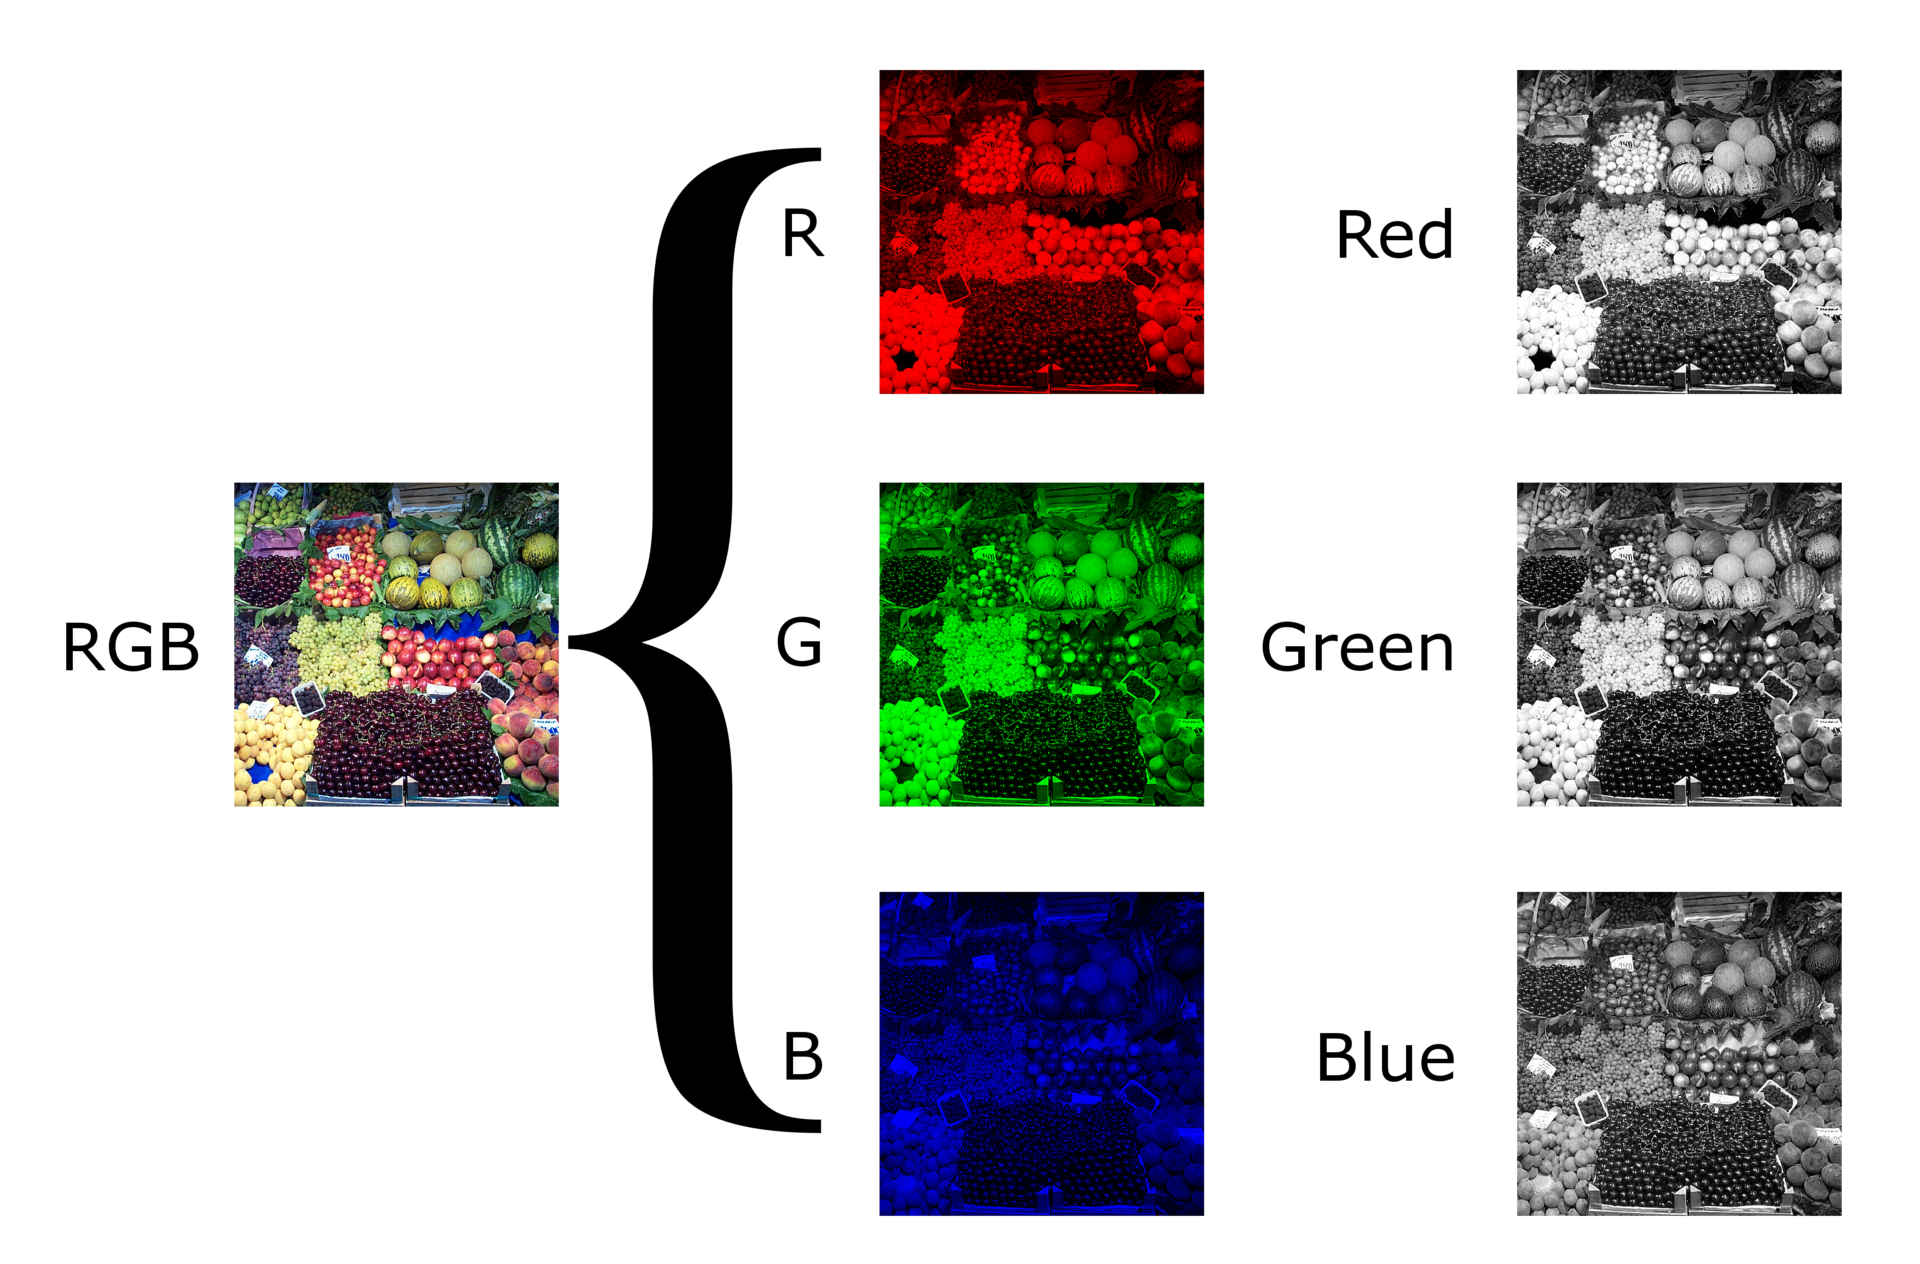

Each channel only contains one "graycale" image. Three "graycale" images represent the color portion for red, green and blue. Each "grayscale" image is a 2-D matrice. And the value stored in each cell ranges from 0~255.



### *Goal: Given an image, your code should be able to recognize what it is.*

### *Approach: using convolutional neural network.*

## Step 2: Dataset (details & Operation)

### Let's first play with the dataset (test the following code)

### Download the data

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

# Preparing for Data
print('==> Preparing data..')

# Training Data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
# Testing Data preparation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

#classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

==> Preparing data..


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified




> *The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.*


You do NOT need the following code. But you can play with it to check the information about the data (dimension,visualization)

torch.Size([128, 3, 32, 32])
you want to display frog


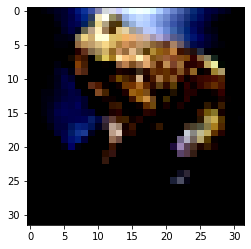

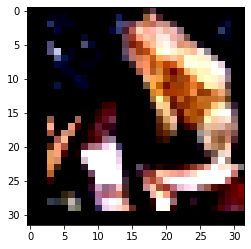

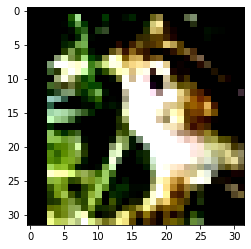

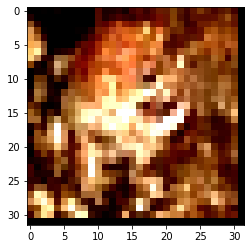

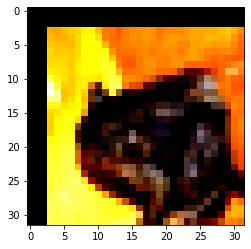

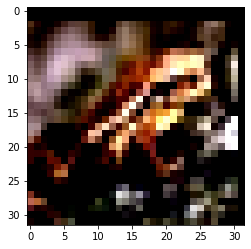

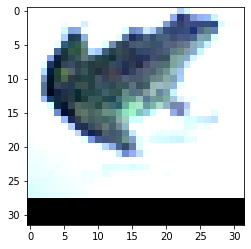

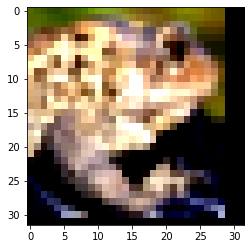

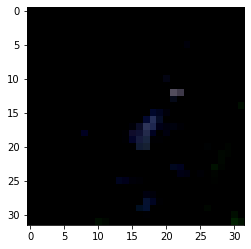

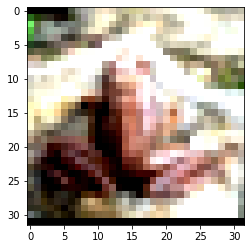

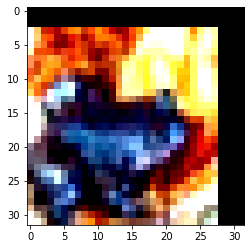

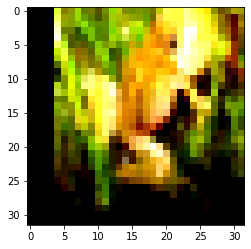

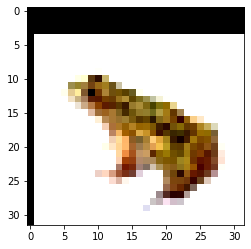

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torchvision as tv
def imshow(img):
  img = img / 2 + 0.5   # unnormalize
  npimg = img.numpy()   # convert from tensor
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# get  training images
dataiter = iter(train_loader)
imgs, lbls = dataiter.next()
print(imgs.shape)
# what you want to display
Item=6    # 6 = frog
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print("you want to display",classes[Item] )
for i in range(100):  # show just the frogs
  if lbls[i] == Item:
    imshow(tv.utils.make_grid(imgs[i]))




If the above one looks ugly. You can try the next one. (This block of code is just for you to better understand what are the data. You do not need this in the homework)

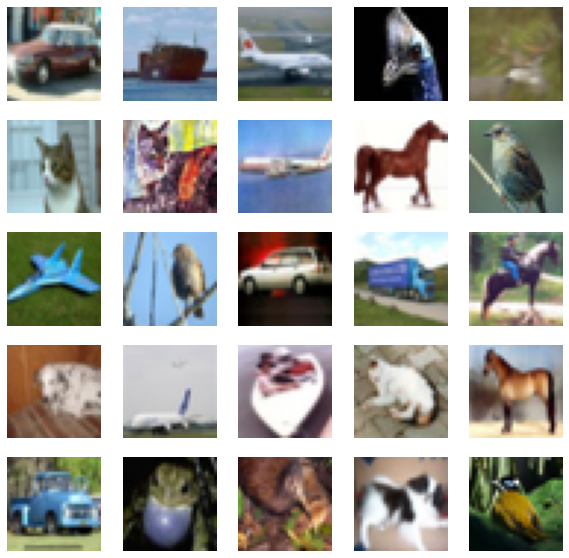

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle

f = open('./data/cifar-10-batches-py/data_batch_1', 'rb')
datadict = cPickle.load(f,encoding='latin1')
f.close()
X = datadict["data"]
Y = datadict['labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(10,10))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])

**What one image looks like**

In [ ]:
print(imgs[40].shape)

torch.Size([3, 32, 32])


In [ ]:
print(imgs[40])

tensor([[[-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         ...,
         [-1.6149, -1.6149, -1.6149,  ..., -1.5374, -2.4291, -2.4291],
         [-1.6343, -1.6343, -1.6343,  ..., -1.7118, -2.4291, -2.4291],
         [-1.7118, -1.6924, -1.6924,  ..., -1.8087, -2.4291, -2.4291]],

        [[-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         ...,
         [-1.4546, -1.4742, -1.4742,  ..., -1.3956, -2.4183, -2.4183],
         [-1.4742, -1.4939, -1.4939,  ..., -1.5726, -2.4183, -2.4183],
         [-1.5529, -1.5529, -1.5529,  ..., -1.6709, -2.4183, -2.4183]],

        [[-2.2214, -2.2214, -2.2214,  ..., -2.2214, -2.2214, -2.2214],
         [-2.2214, -2.2214, -2.2214,  ..., -2

# Step 3: Example Model (CNN)

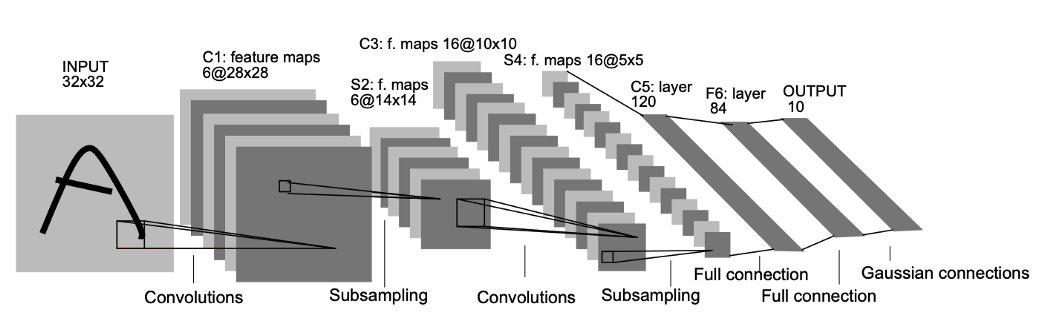

## Having seen the architecture schema and the formula above, we can go over each layer of LeNet-5.


1.   **Layer 1 (C1)**: The first convolutional layer with 6 filters of size  5×5 and the stride of 1. The input of this layer is of size 32×32×3. All convolutional layers should also followed by an activation function (Relu or Tanh)



> *What is the output size? How many channel?*______________



2. **Layer 2 (S2)**: A subsampling/pooling layer with 6 filters of size 2×2 and the stride of 2. (*The subsampling layer in the original architecture was a bit more complex than the traditionally used max/average pooling layers. You can also use max pooling*）.

> *What is the output size? How many channel?*______________

3. **Layer 3 (C3)**: The second convolutional layer is with the same configuration as the first one (i.e., size  5×5 and the stride of 1), however, this layer contains 16 filters.

> *What is the output size? How many channel?*______________

4. **Layer 4 (S4)**: The second pooling layer. The logic is identical to the previous one (the pooling layer not the convolution layer), but this time the layer has 16 filters. The output of this layer is of size 5×5×16.

5. **Layer 5 (C5)**: The last convolutional layer has 120 filters with the size of 5×5. Given that the input to this layer is of size 5×5×16 and the filters are of size 5×5, the output is 1×1×120. As a result, layers S4 and C5 are fully-connected. That is also why in some implementations of LeNet-5 actually use a fully-connected layer instead of the convolutional one as the 5th layer. The reason for keeping this layer as a convolutional one is the fact that if the input to the network is larger than the one used in the original paper (the initial input, so 32×32 in this case), this layer will not be a fully-connected one, as the output of each kernel will not be 1×1.

6. **Layer 6 (F6)**: The first fully-connected layer, which takes the input of 120 units and returns 84 units. In the original paper, the authors used a custom activation function — a variant of the tanh activation function. You can use either tanh or Relu

7. Layer 7 (F7): The last dense layer, which outputs 10 units. In the original paper, the authors used Euclidean Radial Basis Function neurons as activation functions for this layer. Here let's use softmax.




# Layers In Pytorch (How to implement the CNN using Pytorch)

Package: torch.nn

## 1. Convolutional layer:

torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)

> in_channels (int) – Number of channels in the input image

> out_channels (int) – Number of channels produced by the convolution

> kernel_size (int or tuple) – Size of the convolving kernel

> stride (int or tuple, optional) – Stride of the convolution. Default: 1

> padding (int, tuple or str, optional) – Padding added to all four sides of the input. Default: 0

> padding_mode (string, optional) – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'

> dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1

> groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1

> bias (bool, optional) – If True, adds a learnable bias to the output. Default: True

## 2. Fully connected layer:
torch.nn.Linear(in_features, out_features, bias=True)



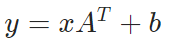


> in_features:size of each input sample

> out_features:size of each output sample

> bias – If set to False, the layer will not learn an additive bias. Default: True



## 3. Maxpooling layer:

torch.nn.functional.max_pool2d(input, kernel_size, stride=None, padding=0, dilation=1, ceil_mode=False, return_indices=False)


> input – input tensor (minibatch , in\_channels , iH , iW)(minibatch,in_channels,iH,iW), minibatch dim optional.

> kernel_size – size of the pooling region. Can be a single number or a tuple (kH, kW)



> stride – stride of the pooling operation. Can be a single number or a tuple (sH, sW). Default: kernel_size

> padding – Implicit negative infinity padding to be added on both sides, must be >= 0 and <= kernel_size / 2.

> dilation – The stride between elements within a sliding window, must be > 0.

> ceil_mode – If True, will use ceil instead of floor to compute the output shape. This ensures that every element in the input tensor is covered by a sliding window.

> return_indices – If True, will return the argmax along with the max values. Useful for torch.nn.functional.max_unpool2d later

## 4. Transform the data into vector (Convolution layers to fully connected layer)

.view(out.size(0), -1)

## You can find the demo code about this network using the following link.

https://towardsdatascience.com/implementing-yann-lecuns-lenet-5-in-pytorch-5e05a0911320

# Other demo and related code:

- please check the Chapter 4.2

- Please check the code:

https://colab.research.google.com/drive/1WnGrysMxEnIgpn_scUCQvt1ODFjsfQpv?usp=sharing

# HW5


##In this homework you need to implement the following CNN network using whatever library.

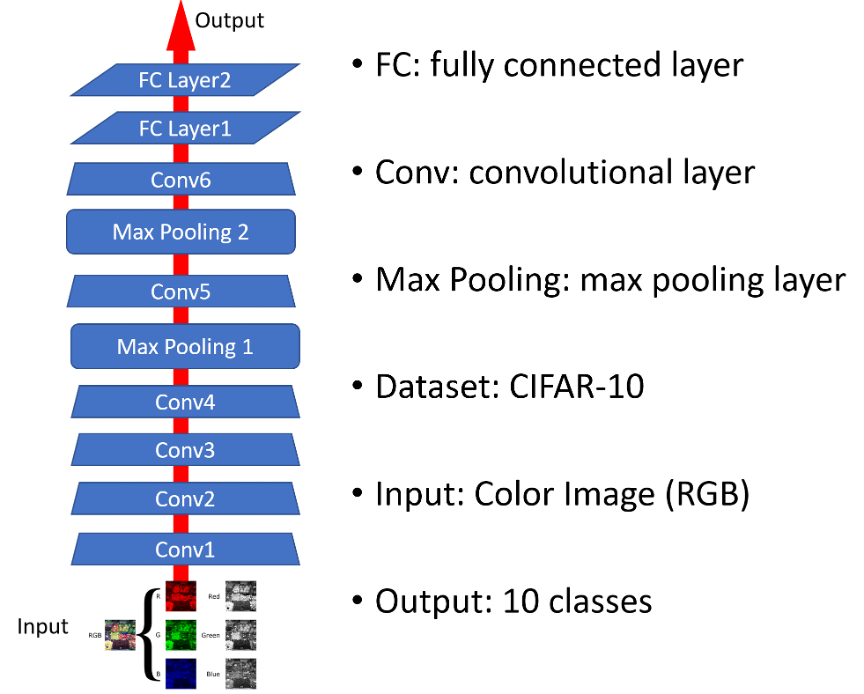

## the detailed information about each layer can be found in the following tabel:

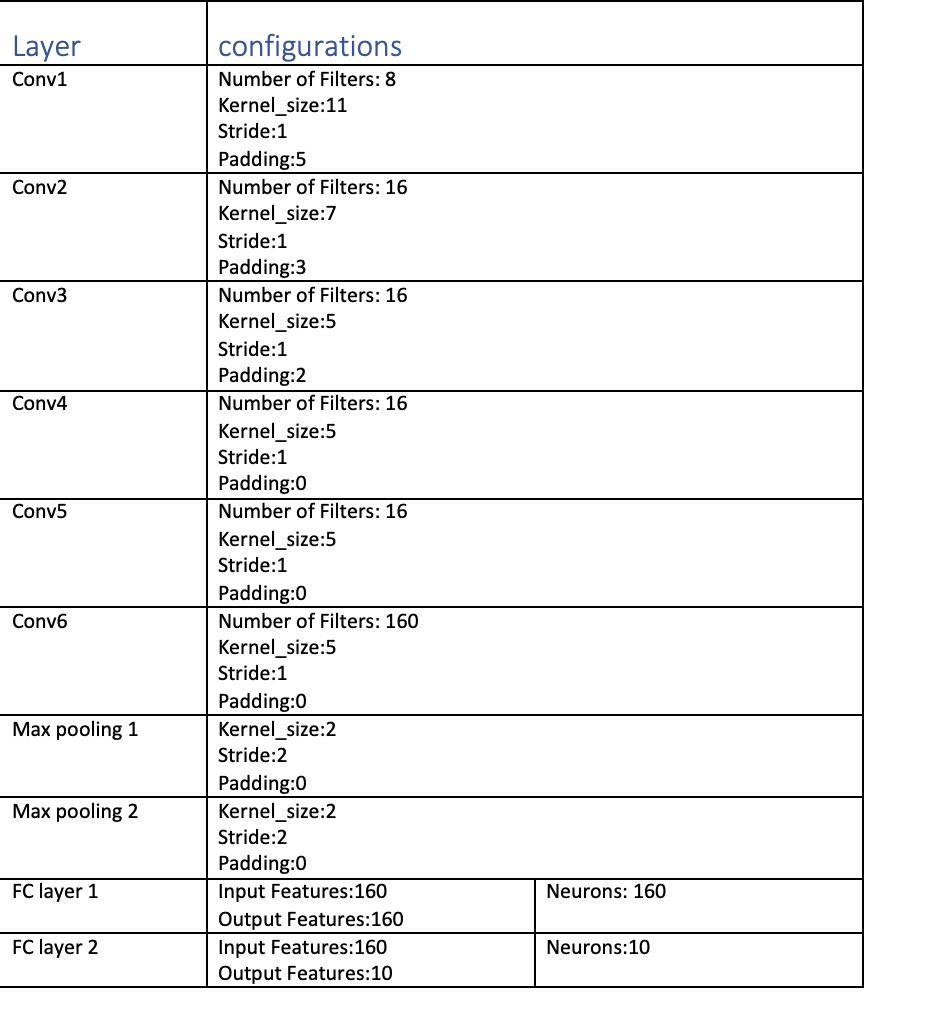

# Note 1: the tabel does not follow the exact order to list the info of each layer. Please check the above figures for the architecture of the neural network and check the table for the details of each layer.

# Note 2: You can use the recommended configurations/hyperparameters for the learning progress

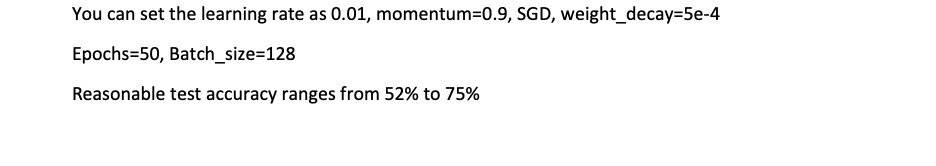

# **Requirement**:


### **Please define all and only the layers that contain parameters (that need to learn) in the "__init__"**

### **Accuracy should be higher than 50%**

### **If you want to use tensorflow or Caffee that would be fine. But we do not have the starting code.**

#**Tips**:

### *Start early. This program takes really long time*

### *You can use GPU to accelerate by seting no_cuda=False and click "runtime"->"Change Runtime type"->"Hardware accelerator"-> chose GPU*

### You can use the following code to start with and add new code to it.

In [ ]:
#nn.BatchNorm1d(120)
#nn.Dropout(p=0.5)
#max_pool2d(out, 2)
#.view(out.size(0), -1)
#nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
#nn.Tanh(),
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import time

# Preparing for Data
print('==> Preparing data..')

# Training Data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])




# Testing Data preparation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

#classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        ############################
        #### Put your code here ####
        ############################

        self.conv1 = nn.Conv2d(3, 8, 11, stride=1, padding=5) #(filt = 8, k=11, s= 1, pad = 5)

        self.conv2 = nn.Conv2d(8, 16, 7, stride=1, padding=3) #(filt = 16, k=7, s= 1, pad = 3)

        self.conv3 = nn.Conv2d(16, 16, 5, stride=1, padding=2) #(filt = 16, k=5, s= 1, pad = 2)

        self.conv4 = nn.Conv2d(16, 16, 5, stride=1, padding=0) #(filt = 16, k=5, s= 1, pad = 0)

        self.conv5 = nn.Conv2d(16, 160, 5, stride=1, padding=0) #(filt = 16, k=5, s= 1, pad = 0)

        self.conv6 = nn.Conv2d(160, 160, 5, stride=1, padding=0) #(filt = 160, k=5, s= 1, pad = 0)

        self.fc1 = nn.Linear(160, 160)

        self.fc2 = nn.Linear(160, 10)

        ###########################
        #### End of your codes ####
        ###########################

    def forward(self, x):
        ############################
        #### Put your code here ####
        ############################

        out = F.relu(self.conv1(x))
        out = F.relu(self.conv2(out))
        out = F.relu(self.conv3(out))
        out = F.relu(self.conv4(out))

        out = F.max_pool2d(out, 2, stride=2) # k = 2, stride=2, padding=0

        out = F.relu(self.conv5(out)) # output is (120 x 1 x 1)--> must flatten

        out = F.max_pool2d(out, 2, stride=2) # k = 2, stride=2, padding=0

        out = F.relu(self.conv6(out)) # output is (120 x 1 x 1)--> must flatten

        out = out.view(out.size(0), -1) #convert output data into one vector This line is Flattening
        out = F.relu(self.fc1(out))
        out = F.log_softmax(self.fc2(out)) # use softmax for the last step , after fc2 to convert output into values ranging from 0,1 and all add up to 1

        ###########################
        #### End of your codes ####
        ###########################


        return out



def train(model, device, train_loader, optimizer, epoch):
    model.train()
    count = 0
    for batch_idx, (data, target) in enumerate(train_loader):
      #data is the images and target is the label
      #(i.e., "0,1,2...9" representing each class)
        data, target = data.to(device), target.to(device)
        ############################
        #### Put your code here ####
        ############################
        optimizer.zero_grad() # Clear the derivative
        output = model(data) # actually run forward()
        loss=F.cross_entropy(output, target) #data loss
        loss.backward()#backpropagation
        optimizer.step() #update the parameters

        ###########################
        #### End of your codes ####
        ###########################
        '''
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        '''
def test( model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

def main():
    time0 = time.time()
    # Training settings
    batch_size = 128
    epochs = 50
    lr = 0.05
    no_cuda = False
    save_model = False
    use_cuda = not no_cuda and torch.cuda.is_available()
    torch.manual_seed(100)
    device = torch.device("cuda" if use_cuda else "cpu")

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

    model = LeNet().to(device)
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=5e-4)

    for epoch in range(1, epochs + 1):
        timeS = time.time()
        train( model, device, train_loader, optimizer, epoch)

        test( model, device, test_loader)
        timee = time.time()
        #break
        print ('Time With GPU: %s seconds ' % (timee-timeS))

    if (save_model):
        torch.save(model.state_dict(),"cifar_lenet.pt")
    time1 = time.time()
    print ('Traning and Testing total excution time is: %s seconds ' % (time1-time0))
if __name__ == '__main__':
    main()

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Average loss: 1.8231, Accuracy: 3158/10000 (32%)

Time With GPU: 281.1427731513977 seconds 

Test set: Average loss: 1.6722, Accuracy: 3792/10000 (38%)

Time With GPU: 281.12708854675293 seconds 

Test set: Average loss: 1.5568, Accuracy: 4232/10000 (42%)

Time With GPU: 271.70638251304626 seconds 

Test set: Average loss: 1.5542, Accuracy: 4422/10000 (44%)

Time With GPU: 271.84444093704224 seconds 

Test set: Average loss: 1.5175, Accuracy: 4463/10000 (45%)

Time With GPU: 273.45768427848816 seconds 

Test set: Average loss: 1.4796, Accuracy: 4622/10000 (46%)

Time With GPU: 268.47052478790283 seconds 

Test set: Average loss: 1.4614, Accuracy: 4706/10000 (47%)

Time With GPU: 267.6609568595886 seconds 

Test set: Average loss: 1.4202, Accuracy: 4854/10000 (49%)

Time With GPU: 268.8377447128296 seconds 

Test set: Average loss: 1.3794, Accuracy: 5038/10000 (50%)

Time With GPU: 269.05943512916565 seconds 

Test set: Average loss: 1.3620, Accuracy: 5214/10000 (52%)

Time W